## Temperatur lokalt og globalt

I denne oppgaven ser vi på: 
- Temperaturanomalier fra Bergen og globalt og CO2. 
- Trendlinjer og polynom av ulik orden, og den fysiske betydningen
- Ulike måter å presentere og sammenligne data på. 

#### Temperaturstripe-figurene i denne oppgaven er inpirert av [Ed Hawkins sin figur](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
SMALL_SIZE = 13
MEDIUM_SIZE = 17
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Last inn datasett over global temperatur (siden 1880) og temperatur i Bergen (siden 1862)

In [3]:
# Datasettet over global temperatur

# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/ikkeGit/temperaturstriper'
fil='/Global_temp1880-2022.txt'

# Pass på at resultatet av sti+fil er nøyaktig det samme som der filen
# faktisk ligger på PCen din. 
sti+fil

'W:/Work/Documents/EkteData/ikkeGit/temperaturstriper/Global_temp1880-2022.txt'

#### Last inn datasettene med Pandas
Se [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for forklaring på keywordene (sep, index_col etc).

In [4]:
df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    skipinitialspace=True # Skip spaces after delimiter.
)

# From the doc: index_col=False can be used to force pandas to not use the 
# first column as the index, e.g. when you have a malformed file with 
# delimiters at the end of each line.

In [5]:
df

,Year,Temp
0,1880.0,0.086
1,1881.0,0.168
2,1882.0,0.122
3,1883.0,0.066
4,1884.0,-0.062
...,...,...
138,2018.0,1.131
139,2019.0,1.255
140,2020.0,1.296
141,2021.0,1.130


In [6]:
# Lag en dictionary for tid og temp for å slippe å holde styr på så mange 
# variabler når vi laster inn tid og temp for både Bergen og globalt.
tid, temp={},{}

In [7]:
# Gi den første kolonnen til "tid" og den andre kolonnen til "temp"
tid['Global']=np.copy(df.iloc[:,0])
temp['Global']=np.copy(df.iloc[:,1])

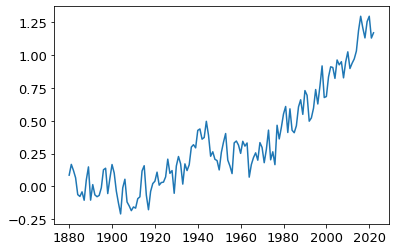

In [8]:
plt.plot(tid['Global'], temp['Global'])

In [9]:
# Last inn datasettet over temperatur i Bergen
fil='/Bergen_temp1862_2022.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    skipinitialspace=True 
)

In [10]:
df

,Year,null,temp,anomaly
0,1862,0,7.76,0.13
1,1863,0,7.78,0.15
2,1864,0,6.91,-0.72
3,1865,0,7.28,-0.35
4,1866,0,7.45,-0.18
...,...,...,...,...
155,2018,0,8.74,1.11
156,2019,0,8.85,1.23
157,2020,0,9.46,1.83
158,2021,0,8.50,0.88


In [11]:
tid['Bergen']=np.copy(df.iloc[:,0])
# Vi vil se på anomalier, så vi setter den tredje kolonnen til temp['Bergen']
temp['Bergen']=np.copy(df.iloc[:,3]) 

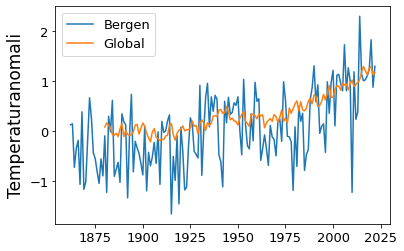

In [12]:
# Ta en titt på dataene
plt.plot(tid['Bergen'], temp['Bergen'], label='Bergen')
plt.plot(tid['Global'], temp['Global'], label='Global')
plt.legend()
plt.ylabel('Temperaturanomali')
plt.show()

### Spørsmål
#### Det er to typer variabilitet i dataene: temperaturanomaliene varierer fra år til år, men også over lang tid
- Hvorfor varierer temperaturanomaliene så mye mer fra år til år i Bergen enn globalt? 
- Hvordan er langtidsvariabiliteten likevel så lik?

_____________
### Beskriv langtidsvariasjonen i Bergen: legg på fire trendlinjer:
- En for hele datasettet, 
- en for perioden fra jeg er født til idag,
- en for perioden fra dere er født (ca 2007?) til idag, og
- en for perioden fra foreldrene deres er født (ca 1970?) til idag.


In [13]:
# Finn indeksen til år 2007, 1994, og 1970
id07=np.where(tid['Bergen']==2007)[0][0]
id94=np.where(tid['Bergen']==1994)[0][0]
id70=np.where(tid['Bergen']==1970)[0][0]

# Sjekk at indeksene vi har funnet stemmer
tid['Bergen'][id07], tid['Bergen'][id94], tid['Bergen'][id70]

(2007, 1994, 1970)

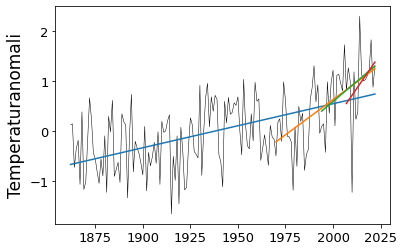

In [14]:
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5)
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1)   
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'C0')

a, b = np.polyfit(tid['Bergen'][id70:], temp['Bergen'][id70:], 1)   
plt.plot(tid['Bergen'][id70:], a*tid['Bergen'][id70:] + b, 'C1')

a, b = np.polyfit(tid['Bergen'][id94:], temp['Bergen'][id94:], 1)   
plt.plot(tid['Bergen'][id94:], a*tid['Bergen'][id94:] + b, 'C2')

a, b = np.polyfit(tid['Bergen'][id07:], temp['Bergen'][id07:], 1)   
plt.plot(tid['Bergen'][id07:], a*tid['Bergen'][id07:] + b, 'C3')
plt.ylabel('Temperaturanomali')

plt.show()

Text(0, 0.5, 'Temperaturanomali')

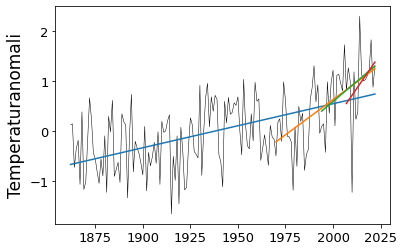

In [15]:
# Dette blir ryddigere med en for-løkke
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5)

idt=[0, id70, id94, id07]
for count,start in enumerate(idt):
    a, b = np.polyfit(tid['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        tid['Bergen'][start:], a*tid['Bergen'][start:] + b, 
        'C'+str(count)
    )
plt.ylabel('Temperaturanomali')


### Spørsmål
- Hva er forskjellen på trendlinjene?
- Hva skjer med trendlinjene når startdatoen for beregningsperioden øker? 
- Hva betyr dette fysisk?

_____________
### Beregne polynom av høyere orden

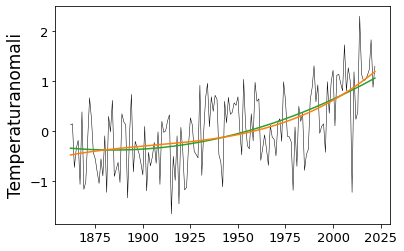

In [16]:
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5)

# Andregrads polynom tilpasset dataene
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2) 
plt.plot(
    tid['Bergen'], 
    a[0]*tid['Bergen']**2 + a[1]*tid['Bergen'] + a[2], 
    'C2', label='Trend'
)

# Tredjegrads polynom tilpasset dataene
b = np.polyfit(tid['Bergen'], temp['Bergen'], 3)   
plt.plot(
    tid['Bergen'], 
    b[0]*tid['Bergen']**3 + b[1]*tid['Bergen']**2 + b[2]*tid['Bergen'] + b[3], 
    'C1', label='Trend'
)
plt.ylabel('Temperaturanomali')

plt.show()

### Spørsmål
- Hva slags informasjon får vi av andregradspolynomet som vi ikke fikk av den lineære trendlinjen over hele tidsserien? 
- Hvilken informasjon tilfører tredjegradspolynomet? 

______________
### Hva med den globale trendlinjen?
Velg ut perioden 1880-2022 for at tidsseriene skal stemme overens. 

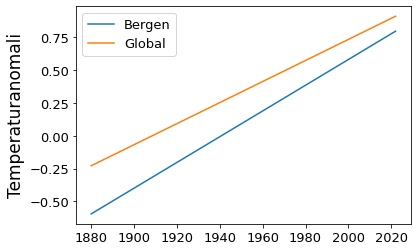

In [17]:
id80=np.where(tid['Bergen']==1880)[0][0]

a, b = np.polyfit(tid['Bergen'][id80:], temp['Bergen'][id80:], 1)   
plt.plot(tid['Bergen'][id80:], a*tid['Bergen'][id80:] + b, label='Bergen')

a, b = np.polyfit(tid['Global'], temp['Global'], 1)   
plt.plot(tid['Global'], a*tid['Global'] + b, label='Global')
plt.legend()
plt.ylabel('Temperaturanomali')

plt.show()

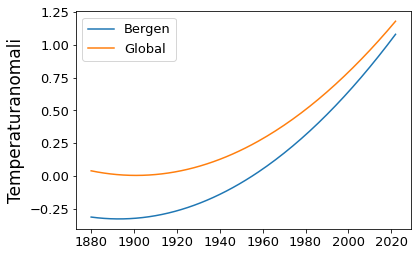

In [18]:
# Andregrads polynom tilpasset dataene
a = np.polyfit(tid['Bergen'][id80:], temp['Bergen'][id80:], 2) 
plt.plot(
    tid['Bergen'][id80:], 
    a[0]*tid['Bergen'][id80:]**2 + a[1]*tid['Bergen'][id80:] + a[2], 
    label='Bergen'
)
a = np.polyfit(tid['Global'], temp['Global'], 2) 
plt.plot(
    tid['Global'], 
    a[0]*tid['Global']**2 + a[1]*tid['Global'] + a[2], 
    label='Global'
)
plt.legend()
plt.ylabel('Temperaturanomali')

plt.show()

### Spørsmål
- Hva forteller de lineære trendlinjene oss om den globale temperaturendringen vs temperaturendringen i Bergen?
- Hva med andregrads polynomene?

______________

### Plot tidsserien som et histogram med fargene brukt i den originale "temperaturstripe"-figuren laget av [Ed Hawkins](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).

In [19]:
# Fargekart fra den originale tremperaturstripe-figuren 
# med 8 blå og 8 røde farger 
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])


(-2.0, 2.4)

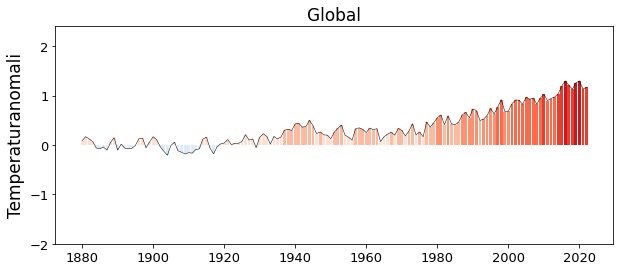

In [20]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Global'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Global'][i])*4))
    plt.bar(tid['Global'][i], temp['Global'][i], color=cmap.colors[c])
    
plt.plot(tid['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylabel('Temperaturanomali')
plt.title('Global')
plt.ylim(-2, 2.4)

Text(0.5, 1.0, 'Bergen')

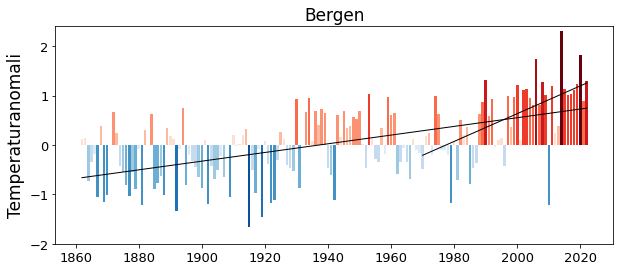

In [21]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
idt=[0, id70]
for count,start in enumerate(idt):
    a, b = np.polyfit(tid['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        tid['Bergen'][start:], a*tid['Bergen'][start:] + b, 
        'k', linewidth=1
    )
plt.ylabel('Temperaturanomali')
plt.title('Bergen')


________________________
### Legg til CO2

Temperatur er knyttet til CO2 i atmosfæren via drichuseffekten som påvirker den globale strålingsbalansen. Dette blir tydelig dersom vi plotter temperaturanomaliene i samme figur som CO2.

In [22]:
# Last inn datasettet over CO2 fra iskjerner tatt i Antarktis (1832-1978)
fil='/law_co2.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    skipinitialspace=True 
)

In [23]:
tidco2=np.copy(df.iloc[:,0])
co2=np.copy(df.iloc[:,1])

In [24]:
# Last inn datasettet over CO2 fra instrumentelle målinger (1979-2021)
fil='/NOAA_CO2.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    skipinitialspace=True,
    skiprows=55
)

In [25]:
# # Sett de to datasettene sammen
# tidco2=tidco2.append(df.iloc[:,0])
# co2=co2.append(df.iloc[:,1])

tidco2=np.append(tidco2, np.copy(df.iloc[:,0]))
co2=np.append(co2, np.copy(df.iloc[:,1]))

Text(0, 0.5, 'CO2')

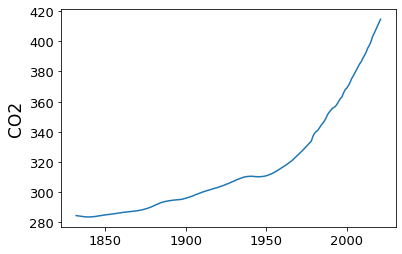

In [26]:
plt.plot(tidco2, co2)
plt.ylabel('CO2')


### Lag en figur med temperaturstriper, andre ordens tilpasset polynom og globalt CO2-nivå

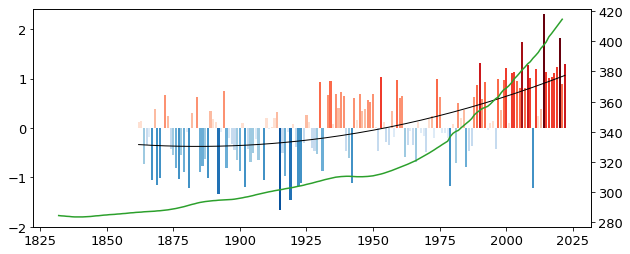

In [27]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
plt.plot(
    tid['Bergen'], a[0]*tid['Bergen']**2 
    + a[1]*tid['Bergen'] + a[2], 
    'k', linewidth=1
)
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2')


#### Tilpass aksene i figuren for å vise informasjonen tydeligere

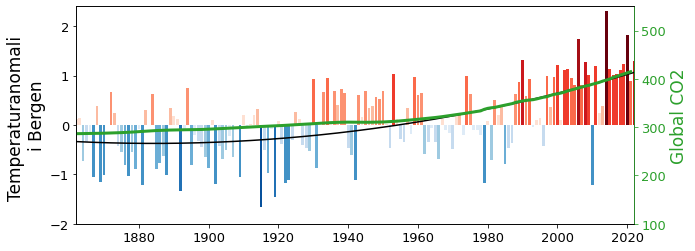

In [28]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
plt.plot(
    tid['Bergen'], a[0]*tid['Bergen']**2 
    + a[1]*tid['Bergen'] + a[2], 
    'k'
)

ax.set_ylabel('Temperaturanomali \ni Bergen')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
ax2.set_ylim(100, 550)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')


plt.xlim(tid['Bergen'][0], tid['Bergen'][-1])
plt.show()

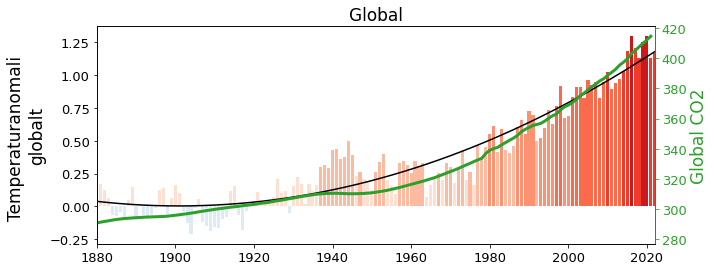

In [30]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Global'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Global'][i])*4))
    plt.bar(tid['Global'][i], temp['Global'][i], color=cmap.colors[c])
    
# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Global'], temp['Global'], 2)   
plt.plot(
    tid['Global'], a[0]*tid['Global']**2 
    + a[1]*tid['Global'] + a[2], 
    'k'
)

ax.set_ylabel('Temperaturanomali \nglobalt')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')

plt.title('Global')
plt.xlim(tid['Global'][0], tid['Global'][-1])
plt.show()

### Spørsmål
- Hva tror du den globale temperaturanomalien vil være i 2040? 
    - Hvilke antakelser gjør du for å komme frem til svaret ditt? 
- Hva tror du temperaturanomalien i Bergen vil være i 2040?
- Har du mest tiltro til svaret ditt for Bergen eller globalt? Hvorfor? 

- Hva synes du om denne måten å presentere disse dataene på? Hva synes du om å tilpasse aksene slik som over?